In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential     #线性堆叠模型
from keras.layers import Dense         #全连接模式
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
import tensorflow as tf

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
(X_train_image,y_train_label),(X_test_image,y_test_label) = mnist.load_data()

In [4]:
print(len(y_train_label))
print(len(y_test_label))

60000
10000


In [6]:
print(type(X_train_image[0]))
type(y_train_label)

<class 'numpy.ndarray'>


numpy.ndarray

In [5]:
def plot_image(image):
    #设置显示图行的大小
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    #使用plt.imshow函数 cmap参数设置为"binary", 以黑白灰度显示
    plt.imshow(image, cmap = "binary")
    plt.show()

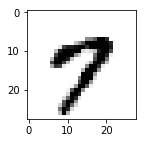

In [14]:
plot_image(X_train_image[15])

In [6]:
# images图片集;labels真实值;prediction预测结果列表;idx第一张图的序列;num显示图片的数量
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10): 
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25 :
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5, 5, i+1)    #在当前画布中添加子图，     该图为5*5
        ax.imshow(images[idx], cmap = "binary")
        title = "label=" + str(labels[idx])
        if len(prediction)>0:
            title += "prediction" + str(prediction[idx])
        ax.set_title(title, fontsize = 10)                  #plt.title & plt.subplot.title 
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

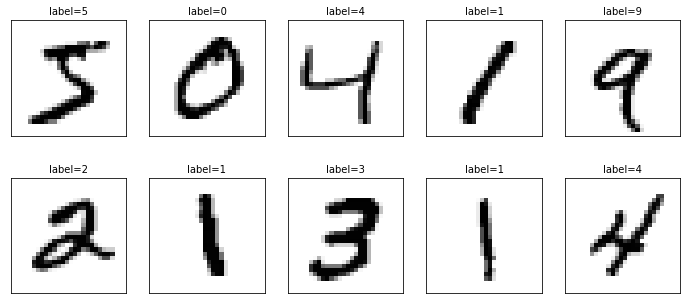

In [16]:
plot_images_labels_prediction(X_train_image, y_train_label, [], 0, 10)

# 数据预处理

# 对X进行处理

In [30]:
print(X_train_image.shape)
print(y_train_label.shape)

(60000, 28, 28)
(60000,)


In [7]:
X_train_image.dtype

dtype('uint8')

In [6]:
x_Train = X_train_image.reshape(60000, 28*28).astype(np.float32)
x_Test = X_test_image.reshape(10000, 28*28).astype(np.float32)

In [7]:
print(x_Train.shape)

(60000, 784)


In [10]:
print(X_train_image.max())

255


In [11]:
x_Train_normalize = X_train_image.reshape(60000, 28*28).astype(np.float32)/255
x_Test_normalize = X_test_image.reshape(10000, 28*28).astype(np.float32)/255

In [12]:
x_Train_normalize

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 将图片信息标准化，全部变为0-1之间的数

In [9]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [10]:
x_Train_normalize

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 对y值进行处理，对其进行独热编码

In [39]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [12]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# 建立初级模型，使用keras多层感知器，输入层784个神经元，隐藏层256个神经元，输出层10个神经元

In [13]:
from keras.models import Sequential     #线性堆叠模型
from keras.layers import Dense         #全连接模式

In [14]:
model = Sequential()

### 建立输出层和隐藏层，因为只要一层隐藏层，且使用全连接模式，输入和隐藏层一次创建

In [13]:
model = Sequential()

In [15]:
model.add(Dense(
    units = 256,
    input_dim = 784,
    kernel_initializer = "normal",          #使用normal_distribution正态分布的随机数来初始化weight（权重）与bias（偏差）
    activation = "relu"                     #激活函数为relu
))

### 建立输出层

In [16]:
model.add(Dense(
    units = 10,
    kernel_initializer = "normal",             #使用normal_distribution正态分布的随机数来初始化weight（权重）与bias（偏差）
    activation = "softmax"                     #激活函数为softmax
))

#### 隐藏层256个神经元，由于输入层和隐藏层一起建立，所以没有显示输入层；输出层10个神经元

## Param

#### 每一层的Param都是超参数（Hyper-Parameters）。我们需要通过反向传播算法进行更新神经元连接的权重与偏差

#### 建立输入层与隐藏层的公式：h1 = relu(X*W1 + b1)
#### 建立隐藏层与输出层的公式：y = softmax(h1*W2 + b2)

#### 每一层Prarm的计算方式：Param = （上一层神经元数量）*（本层神经元数量）+（本层神经元数量）

#### 所以全部必须训练的超参数（Trainable Param）是每一层Prarm的总和，计算方式：200963（隐藏层的Param）+2570（输出层的Param）=203530

#### 通常情况下，Trainable Param数值越大，代表此模型越复杂，需要的训练时间越长

In [26]:
#查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
784*256+256==200960

True

In [50]:
200960+2570==203530

True

In [17]:
#定义训练方式                  compile进行编译
model.compile(
    loss = "categorical_crossentropy",     #设置损失函数，在深度学习中使用cross_entropy（交叉熵）训练的效果较好
    optimizer = "adam",                    #深度学习中使用adam优化器可以让训练更快收敛，并提高准确率
    metrics = ["accuracy"]                 #设置评估模型的方式是准确率
)

#### 使用48000项训练数据进行训练，分为每一批次200项，所以大约分为240个批次进行训练（48000/200=240）

#### 训练完成后，会计算这一训练周期的准确率和误差，并在train_history中新增一项数据记录

In [18]:
#将模型训练的过程数据存储在变量train_history中便于后续进行绘图观察
train_history = model.fit(
    x = x_Train_normalize,
    y = y_TrainOneHot,
    validation_split = 0.2,     #以8：2拆分训练集分别进行训练和验证
    epochs = 10,                #执行10个训练周期
    batch_size = 200,           #每一批次200个训练数据
    verbose = 2                 #  =2  显示训练过程
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 85s - loss: 0.4354 - acc: 0.8861 - val_loss: 0.2209 - val_acc: 0.9387
Epoch 2/10
 - 2s - loss: 0.1908 - acc: 0.9457 - val_loss: 0.1553 - val_acc: 0.9561
Epoch 3/10
 - 2s - loss: 0.1337 - acc: 0.9621 - val_loss: 0.1304 - val_acc: 0.9623
Epoch 4/10
 - 2s - loss: 0.1023 - acc: 0.9709 - val_loss: 0.1105 - val_acc: 0.9684
Epoch 5/10
 - 2s - loss: 0.0812 - acc: 0.9766 - val_loss: 0.1043 - val_acc: 0.9699
Epoch 6/10
 - 2s - loss: 0.0657 - acc: 0.9821 - val_loss: 0.0924 - val_acc: 0.9728
Epoch 7/10
 - 2s - loss: 0.0545 - acc: 0.9849 - val_loss: 0.0902 - val_acc: 0.9728
Epoch 8/10
 - 2s - loss: 0.0456 - acc: 0.9873 - val_loss: 0.0848 - val_acc: 0.9750
Epoch 9/10
 - 2s - loss: 0.0377 - acc: 0.9903 - val_loss: 0.0832 - val_acc: 0.9744
Epoch 10/10
 - 2s - loss: 0.0314 - acc: 0.9922 - val_loss: 0.0805 - val_acc: 0.9758


In [24]:
train_history.history["val_acc"]

[0.9386666625738144,
 0.9560833324988683,
 0.96225000222524,
 0.9684166689713796,
 0.9699166735013326,
 0.9727500081062317,
 0.9728333433469136,
 0.9750000069538752,
 0.9744166761636734,
 0.9758333434661229]

In [21]:
def  show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

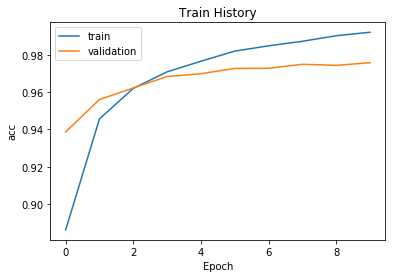

In [22]:
show_train_history(train_history, "acc", "val_acc")

#### 过度拟合：如果“acc训练的准确率”不断提高，但“val_acc训练的准确率”没有一直提高，则可能出现过度拟合现象

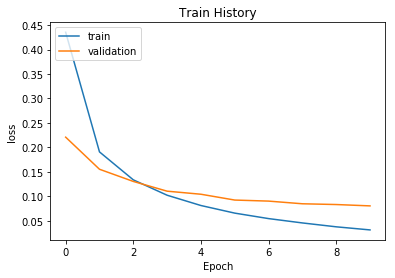

In [26]:
show_train_history(train_history, "loss", "val_loss")

# 用测试数据评估模型的准确率

In [27]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)   #model.evaluate 用于评估模型的准确率

10000/10000 [==============================] - 1s 108us/step


In [31]:
print("accuracy = ",scores[1])

accuracy =  0.978


In [32]:
prediction_1 = model.predict_classes(x_Test)

In [33]:
prediction_2 = model.predict_classes(x_Test_normalize)

In [34]:
type(prediction_1)

numpy.ndarray

In [36]:
print(prediction_1==prediction_2)

[ True  True  True ...  True  True  True]


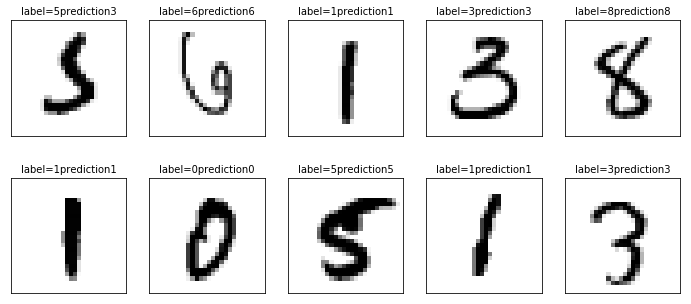

In [38]:
plot_images_labels_prediction(X_test_image, y_test_label, prediction_1, idx = 340)

# 显示混淆矩阵

In [97]:
pd.crosstab(y_test_label,prediction_1, rownames = ["label"], colnames = ["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,1,2,1,2,0
1,0,1124,3,0,0,0,1,0,7,0
2,4,3,1006,4,1,0,3,4,7,0
3,0,0,0,997,0,3,0,3,4,3
4,1,0,2,0,965,0,5,2,1,6
5,2,0,0,9,1,867,4,1,6,2
6,6,3,1,1,3,4,936,0,4,0
7,0,6,7,6,2,0,0,997,3,7
8,2,0,2,7,3,2,4,2,951,1


In [98]:
df = pd.DataFrame({"label":y_test_label, "prediction":prediction_1})

In [101]:
print(df[df.label!=df.prediction])

      label  prediction
8         5           6
151       9           8
247       4           6
321       2           7
340       5           3
445       6           0
495       8           2
551       7           3
582       8           2
583       2           8
619       1           8
659       2           1
684       7           3
691       8           4
720       5           8
740       4           9
846       7           9
951       5           4
965       6           0
1003      5           3
1014      6           5
1032      5           8
1039      7           8
1112      4           6
1178      4           6
1181      6           1
1182      6           8
1194      7           9
1226      7           2
1232      9           4
...     ...         ...
8311      6           4
8325      0           6
8408      8           6
8520      4           9
8522      8           6
9009      7           2
9015      7           2
9019      7           2
9024      7           2
9280      8     

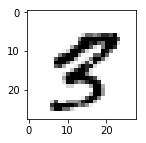

In [104]:
plot_image(X_test_image[9944])

# 将隐藏层增加为1000个神经元，重新训练

In [130]:
model = Sequential()
model.add(Dense(units=1000,
               input_dim=784,
               kernel_initializer="normal",
               activation="relu"))

In [131]:
model.add(Dense(units=10,
               kernel_initializer="normal",
               activation="softmax"))

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [133]:
train_history_1000 = model.fit(x_Train_normalize,
                               y_TrainOneHot,
                               validation_split=0.2,
                               epochs=10,                 #训练周期
                               batch_size=200,
                               verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.2958 - acc: 0.9155 - val_loss: 0.1546 - val_acc: 0.9558
Epoch 2/10
 - 2s - loss: 0.1163 - acc: 0.9664 - val_loss: 0.1116 - val_acc: 0.9673
Epoch 3/10
 - 2s - loss: 0.0743 - acc: 0.9793 - val_loss: 0.0901 - val_acc: 0.9731
Epoch 4/10
 - 2s - loss: 0.0513 - acc: 0.9855 - val_loss: 0.0829 - val_acc: 0.9764
Epoch 5/10
 - 2s - loss: 0.0356 - acc: 0.9900 - val_loss: 0.0786 - val_acc: 0.9770
Epoch 6/10
 - 2s - loss: 0.0244 - acc: 0.9943 - val_loss: 0.0777 - val_acc: 0.9772
Epoch 7/10
 - 2s - loss: 0.0177 - acc: 0.9960 - val_loss: 0.0796 - val_acc: 0.9772
Epoch 8/10
 - 2s - loss: 0.0132 - acc: 0.9973 - val_loss: 0.0789 - val_acc: 0.9766
Epoch 9/10
 - 2s - loss: 0.0106 - acc: 0.9976 - val_loss: 0.0708 - val_acc: 0.9797
Epoch 10/10
 - 2s - loss: 0.0067 - acc: 0.9990 - val_loss: 0.0679 - val_acc: 0.9820


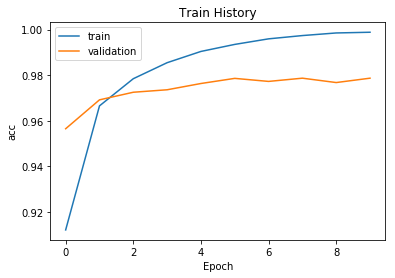

In [127]:
show_train_history(train_history_1000, "acc", "val_acc")

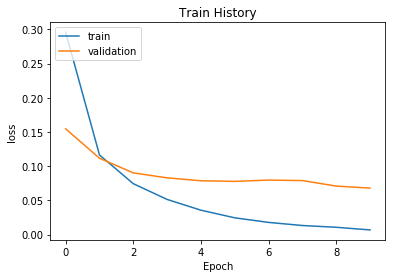

In [134]:
show_train_history(train_history_1000, "loss", "val_loss")

In [135]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)

10000/10000 [==============================] - 1s 123us/step


In [136]:
print(scores[1])

0.9827


#### 发现过拟合更加严重

## 尝试通过加入DropOut功能来避免过拟合

In [14]:
from keras.layers import Dropout

In [15]:
model = Sequential()

In [16]:
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer="normal",
               activation="relu"))

In [17]:
model.add(Dropout(0.5))
model.add(Dense(units=10,
               kernel_initializer="normal",
               activation="softmax"))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [22]:
train_history = model.fit(x=x_Train_normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.5420 - acc: 0.8442 - val_loss: 0.2324 - val_acc: 0.9347
Epoch 2/10
 - 2s - loss: 0.2591 - acc: 0.9256 - val_loss: 0.1689 - val_acc: 0.9544
Epoch 3/10
 - 2s - loss: 0.1998 - acc: 0.9426 - val_loss: 0.1391 - val_acc: 0.9588
Epoch 4/10
 - 2s - loss: 0.1678 - acc: 0.9509 - val_loss: 0.1217 - val_acc: 0.9653
Epoch 5/10
 - 2s - loss: 0.1448 - acc: 0.9577 - val_loss: 0.1099 - val_acc: 0.9674
Epoch 6/10
 - 2s - loss: 0.1283 - acc: 0.9619 - val_loss: 0.1006 - val_acc: 0.9697
Epoch 7/10
 - 2s - loss: 0.1163 - acc: 0.9662 - val_loss: 0.0971 - val_acc: 0.9708
Epoch 8/10
 - 2s - loss: 0.1055 - acc: 0.9685 - val_loss: 0.0888 - val_acc: 0.9733
Epoch 9/10
 - 2s - loss: 0.0973 - acc: 0.9710 - val_loss: 0.0852 - val_acc: 0.9743
Epoch 10/10
 - 2s - loss: 0.0907 - acc: 0.9719 - val_loss: 0.0846 - val_acc: 0.9748


In [23]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print(scores[1])
prediction = model.predict_classes(x_Test)
pd.crosstab(y_test_label,prediction, rownames = ["label"], colnames = ["predict"])

10000/10000 [==============================] - 1s 108us/step
0.9765


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,0,2,1,0,1,1,1,1
1,0,1126,3,1,0,0,2,0,3,0
2,4,1,1003,7,3,0,2,7,5,0
3,0,0,3,993,0,2,0,4,6,2
4,1,0,3,0,962,0,4,1,2,9
5,2,0,0,13,1,861,6,2,3,4
6,5,3,0,1,2,4,940,0,3,0
7,2,8,8,2,0,0,0,1001,0,7
8,2,1,2,8,3,1,1,5,949,2


In [149]:
scores[1]

0.9815

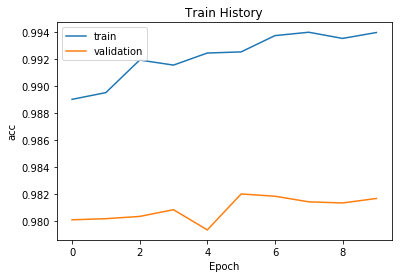

In [151]:
show_train_history(train_history, "acc","val_acc")

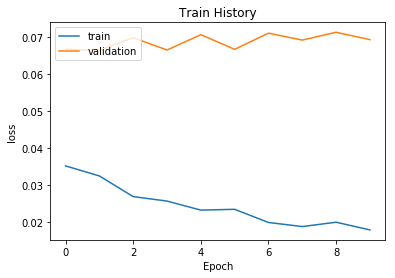

In [152]:
show_train_history(train_history, "loss", "val_loss")

## 尝试建立两个隐藏层

In [182]:
model = Sequential()
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer="normal",
                activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=1000,
               kernel_initializer="normal",
               activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=10,
               kernel_initializer="normal",
               activation="softmax"))

In [164]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [183]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [184]:
train_history_2_1000 = model.fit(x=x_Train_normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.3440 - acc: 0.8937 - val_loss: 0.1293 - val_acc: 0.9605
Epoch 2/10
 - 3s - loss: 0.1422 - acc: 0.9576 - val_loss: 0.0953 - val_acc: 0.9694
Epoch 3/10
 - 3s - loss: 0.1034 - acc: 0.9678 - val_loss: 0.0918 - val_acc: 0.9714
Epoch 4/10
 - 3s - loss: 0.0810 - acc: 0.9748 - val_loss: 0.0839 - val_acc: 0.9753
Epoch 5/10
 - 3s - loss: 0.0678 - acc: 0.9786 - val_loss: 0.0838 - val_acc: 0.9751
Epoch 6/10
 - 3s - loss: 0.0598 - acc: 0.9811 - val_loss: 0.0754 - val_acc: 0.9776
Epoch 7/10
 - 3s - loss: 0.0540 - acc: 0.9820 - val_loss: 0.0804 - val_acc: 0.9772
Epoch 8/10
 - 3s - loss: 0.0474 - acc: 0.9850 - val_loss: 0.0775 - val_acc: 0.9780
Epoch 9/10
 - 3s - loss: 0.0411 - acc: 0.9864 - val_loss: 0.0773 - val_acc: 0.9795
Epoch 10/10
 - 3s - loss: 0.0404 - acc: 0.9867 - val_loss: 0.0736 - val_acc: 0.9807


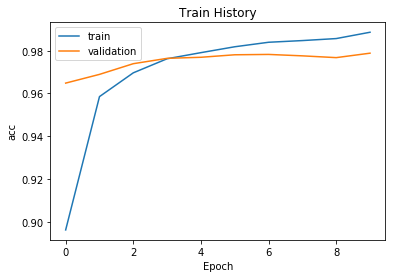

In [167]:
show_train_history(train_history_2_1000, "acc", "val_acc")

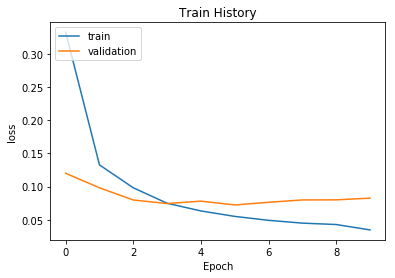

In [168]:
show_train_history(train_history_2_1000, "loss", "val_loss")

In [169]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)

10000/10000 [==============================] - 1s 94us/step


In [170]:
scores[1]

0.9819

In [185]:
prediction = model.predict_classes(x_Test)

In [174]:
pd.crosstab(y_test_label, prediction, rownames=["label"], colnames=["prediction"])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,0,1,1,2,1,1,0
1,0,1131,3,0,0,0,1,0,0,0
2,3,0,1010,1,1,0,1,15,1,0
3,1,0,2,991,0,3,0,11,2,0
4,1,2,2,0,964,0,4,3,0,6
5,2,0,0,5,1,875,6,1,2,0
6,4,2,0,1,3,2,946,0,0,0
7,0,1,4,0,1,0,0,1022,0,0
8,3,1,8,8,1,4,3,13,932,1


In [176]:
def train_process(x, y, droppart):
    model = Sequential()
    model.add(Dense(units=1000,
                    input_dim=784,
                    kernel_initializer="normal",
                    activation="relu"))
    model.add(Dropout(droppart))
    model.add(Dense(units=1000,
                   kernel_initializer="normal",
                   activation="relu"))
    model.add(Dropout(droppart))
    model.add(Dense(units=10,
                   kernel_initializer="normal",
                   activation="softmax"))
    model.compile(loss="categorical_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    train_history = model.fit(x=x,
                              y=y,
                              validation_split=0.2,
                              epochs=10,
                              batch_size=200,
                              verbose=2)
    show_train_history(train_history_2_1000, "acc", "val_acc")
    return model

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.2455 - acc: 0.9255 - val_loss: 0.1066 - val_acc: 0.9687
Epoch 2/10
 - 3s - loss: 0.0861 - acc: 0.9738 - val_loss: 0.0864 - val_acc: 0.9732
Epoch 3/10
 - 3s - loss: 0.0558 - acc: 0.9826 - val_loss: 0.0809 - val_acc: 0.9759
Epoch 4/10
 - 3s - loss: 0.0367 - acc: 0.9882 - val_loss: 0.0838 - val_acc: 0.9773
Epoch 5/10
 - 3s - loss: 0.0263 - acc: 0.9916 - val_loss: 0.0985 - val_acc: 0.9728
Epoch 6/10
 - 3s - loss: 0.0217 - acc: 0.9929 - val_loss: 0.0827 - val_acc: 0.9789
Epoch 7/10
 - 3s - loss: 0.0193 - acc: 0.9935 - val_loss: 0.0829 - val_acc: 0.9801
Epoch 8/10
 - 3s - loss: 0.0158 - acc: 0.9953 - val_loss: 0.0911 - val_acc: 0.9788
Epoch 9/10
 - 3s - loss: 0.0203 - acc: 0.9935 - val_loss: 0.1004 - val_acc: 0.9751
Epoch 10/10
 - 3s - loss: 0.0172 - acc: 0.9945 - val_loss: 0.1073 - val_acc: 0.9758


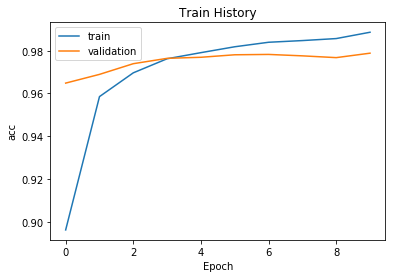

In [177]:
train_process(x_Train_normalize, y_TrainOneHot, 0.1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.3755 - acc: 0.8828 - val_loss: 0.1368 - val_acc: 0.9585
Epoch 2/10
 - 3s - loss: 0.1646 - acc: 0.9498 - val_loss: 0.1020 - val_acc: 0.9678
Epoch 3/10
 - 3s - loss: 0.1209 - acc: 0.9624 - val_loss: 0.0962 - val_acc: 0.9708
Epoch 4/10
 - 3s - loss: 0.0981 - acc: 0.9692 - val_loss: 0.0888 - val_acc: 0.9740
Epoch 5/10
 - 3s - loss: 0.0843 - acc: 0.9725 - val_loss: 0.0793 - val_acc: 0.9768
Epoch 6/10
 - 3s - loss: 0.0728 - acc: 0.9760 - val_loss: 0.0728 - val_acc: 0.9783
Epoch 7/10
 - 3s - loss: 0.0661 - acc: 0.9788 - val_loss: 0.0824 - val_acc: 0.9771
Epoch 8/10
 - 3s - loss: 0.0626 - acc: 0.9798 - val_loss: 0.0754 - val_acc: 0.9799
Epoch 9/10
 - 3s - loss: 0.0532 - acc: 0.9829 - val_loss: 0.0718 - val_acc: 0.9789
Epoch 10/10
 - 3s - loss: 0.0553 - acc: 0.9821 - val_loss: 0.0746 - val_acc: 0.9795


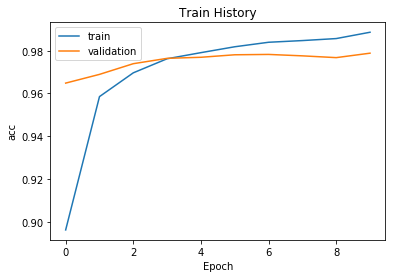

In [178]:
train_process(x_Train_normalize, y_TrainOneHot, 0.5)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.6023 - acc: 0.8128 - val_loss: 0.1783 - val_acc: 0.9477
Epoch 2/10
 - 3s - loss: 0.2714 - acc: 0.9177 - val_loss: 0.1411 - val_acc: 0.9591
Epoch 3/10
 - 3s - loss: 0.2133 - acc: 0.9355 - val_loss: 0.1147 - val_acc: 0.9654
Epoch 4/10
 - 3s - loss: 0.1816 - acc: 0.9444 - val_loss: 0.1015 - val_acc: 0.9709
Epoch 5/10
 - 3s - loss: 0.1619 - acc: 0.9505 - val_loss: 0.0947 - val_acc: 0.9717
Epoch 6/10
 - 3s - loss: 0.1468 - acc: 0.9553 - val_loss: 0.0915 - val_acc: 0.9734
Epoch 7/10
 - 3s - loss: 0.1331 - acc: 0.9591 - val_loss: 0.0909 - val_acc: 0.9736
Epoch 8/10
 - 3s - loss: 0.1283 - acc: 0.9611 - val_loss: 0.0847 - val_acc: 0.9744
Epoch 9/10
 - 3s - loss: 0.1206 - acc: 0.9640 - val_loss: 0.0849 - val_acc: 0.9751
Epoch 10/10
 - 3s - loss: 0.1116 - acc: 0.9655 - val_loss: 0.0830 - val_acc: 0.9765


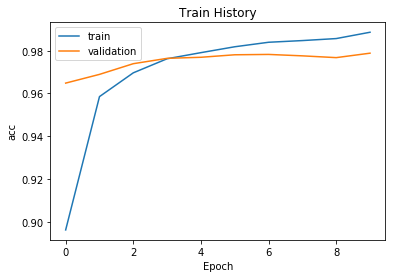

In [179]:
train_process(x_Train_normalize, y_TrainOneHot, 0.7)

In [189]:
def save_result(label, prediction, path, name):
    result = pd.DataFrame({"label":label, "prediction":prediction})
    full_path = path+name+".csv"
    result.to_csv(full_path, index=False)

In [190]:
save_result(y_test_label, prediction, "C:/my python/project_mnist/", "mnist_MLP_prediction")